In [59]:
from collections import Counter
import itertools
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
with open("works_info.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df = df.replace("-1", np.nan)
df["salary_min"] = df["salary"].str.extract(r"(\d+)").astype(float)
df["salary_max"] = df["salary"].str.extract(r"–(\d+)").astype(float)

df["salary_avg"] = df[["salary_min", "salary_max"]].mean(axis=1)
company_salary_avg = df[["company", "salary_avg"]].groupby("company").mean()

company_salary_avg["salary_avg"] = company_salary_avg["salary_avg"].round(2)

company_salary_avg

,salary_avg
company,
AGU,90000.00
AM media solutions,NaN
Appexoft,NaN
BondexREF,10750.00
"Comparus UA (Компарус.ЮА, ТОВ)",NaN
Computools,NaN
Dinamicka Development,NaN
EasyLife,65000.00
ForceService,22500.00


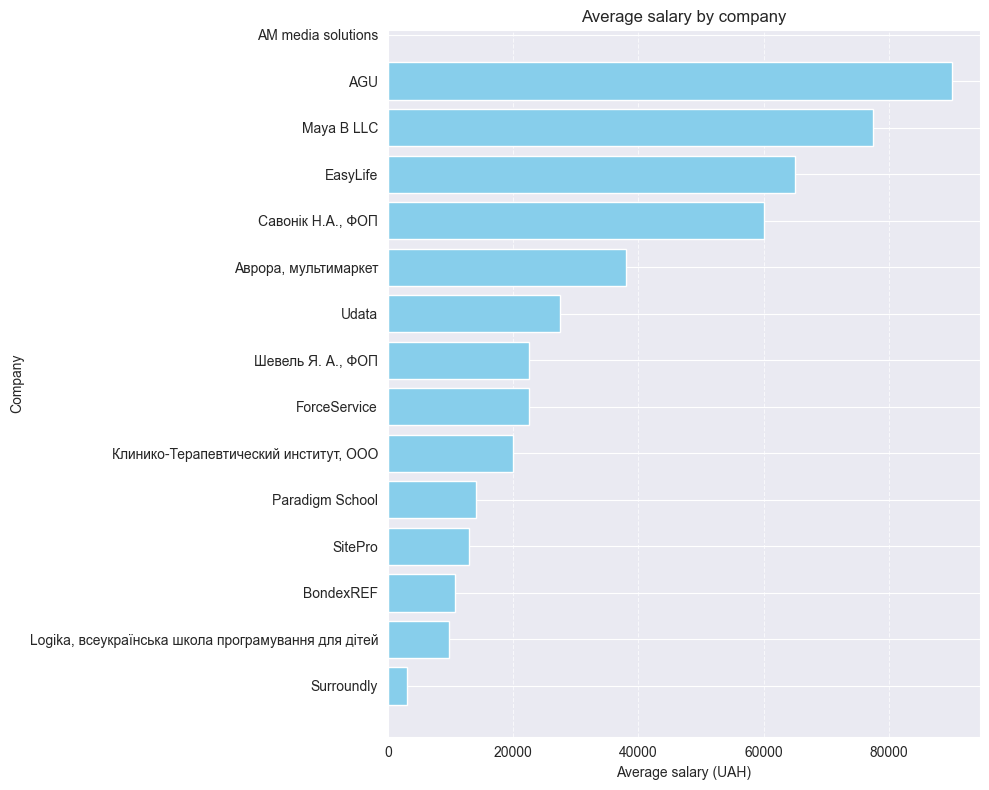

In [63]:
plt.figure(figsize=(10, 8))
company_salary_avg = company_salary_avg.sort_values("salary_avg", ascending=True)
plt.barh(company_salary_avg.index, company_salary_avg["salary_avg"], color="skyblue")
plt.title("Average salary by company")
plt.xlabel("Average salary (UAH)")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [68]:
technologies = list(itertools.chain(*df["technologies"]))

tech_counter = Counter(technologies)
tech_df = pd.DataFrame(tech_counter.items(), columns=["Technology", "Frequency"])

tech_df = tech_df.sort_values(by="Frequency", ascending=False)
tech_df

,Technology,Frequency
2,Програмування,29
10,Бажання вчитися і розвиватися,13
5,Scratch,11
3,Креативність,11
7,JavaScript,11
...,...,...
117,Компʼютерна грамотність,1
118,Пунктуальність,1
119,Ввічливість,1
120,Графічний дизайн,1


In [70]:
job_types = df["title"]
df["job_type"] = job_types

job_type_counts = df["job_type"].value_counts()
job_type_counts

job_type
AI Engineer (                                                                    5
Викладач у дитячу IT-школу програмування (Scratch,                               3
-програміст                                                                      3
Middle                                                                           3
Викладач                                                                         2
Викладач у дитячу IT-школу програмування (геймдизайн, Scratch,                   2
Викладач JS, CSS, HTML,                                                          2
developer                                                                        2
Розробник                                                                        1
Strong Middle PHP Developer (Laravel,                                            1
PHP,                                                                             1
Developer                                                                     

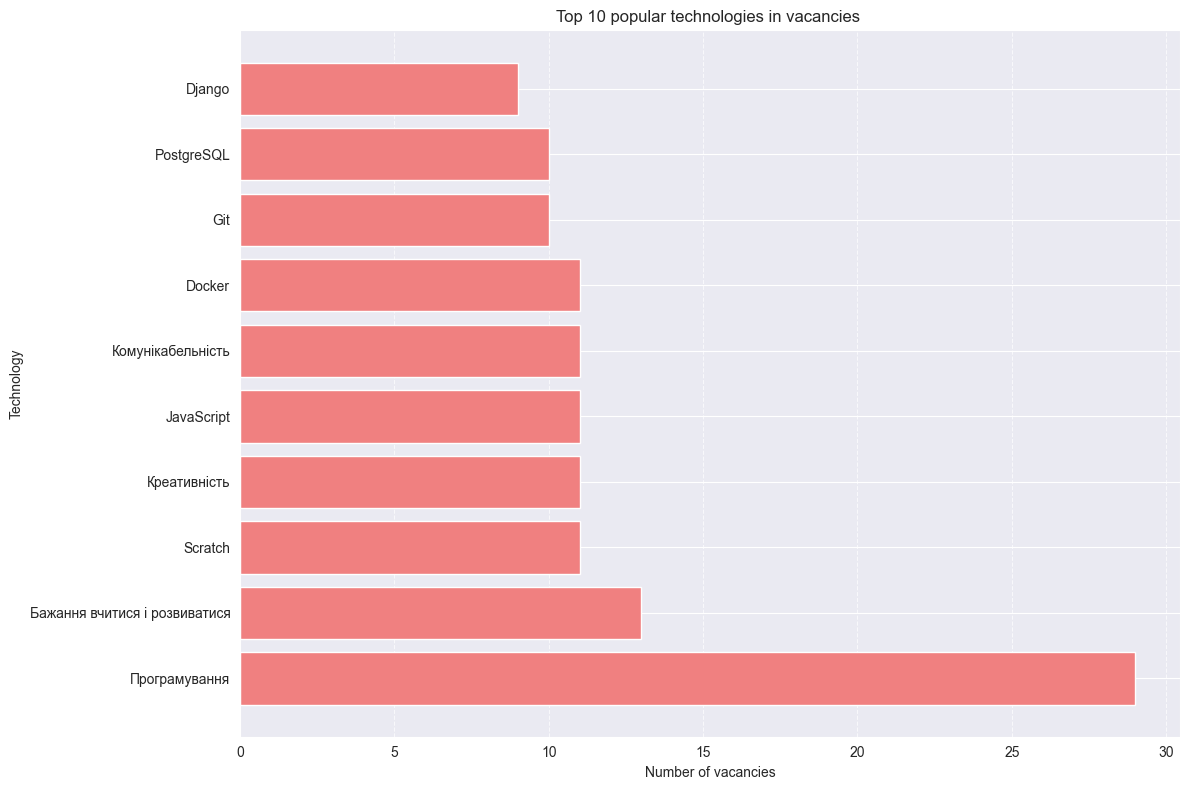

In [71]:
all_technologies = [tech for sublist in df["technologies"].dropna() for tech in sublist]

tech_counts = Counter(all_technologies)
tech_df = pd.DataFrame(tech_counts.items(), columns=["Technology", "Count"])
tech_df = tech_df.sort_values("Count", ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(tech_df["Technology"], tech_df["Count"], color="lightcoral")
plt.title("Top 10 popular technologies in vacancies ")
plt.xlabel("Number of vacancies")
plt.ylabel("Technology")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

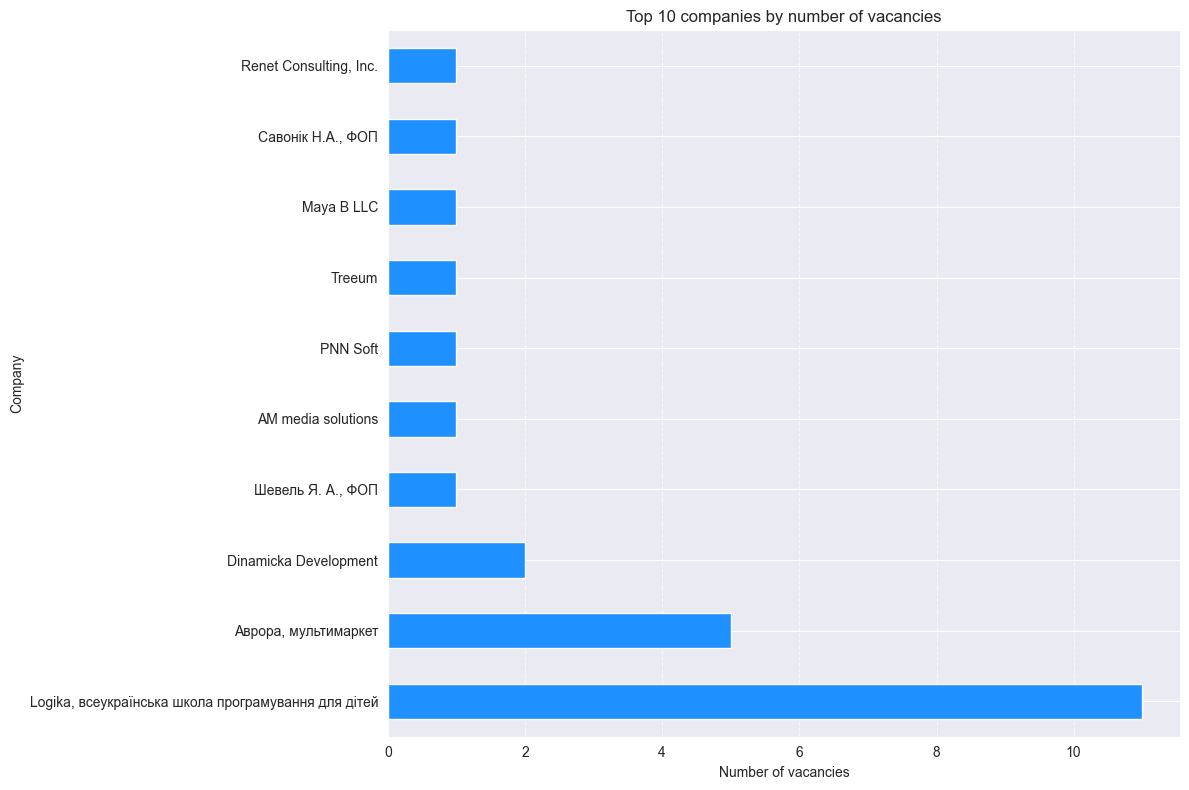

In [73]:
company_vacancy_counts = df["company"].value_counts()

top_10_company_vacancy_counts = company_vacancy_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_company_vacancy_counts.plot(kind="barh", color="dodgerblue")
plt.title("Top 10 companies by number of vacancies")
plt.xlabel("Number of vacancies")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()